In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
energydata = pd.DataFrame.from_csv('../data/energydata_complete.csv', index_col=None, encoding="utf-8")
energydata.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [4]:
energydata.tail(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19733,2016-05-27 17:50:00,420,10,25.5,46.99,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.5,46.60,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [5]:
energydata["date"] = pd.to_datetime(energydata.date)

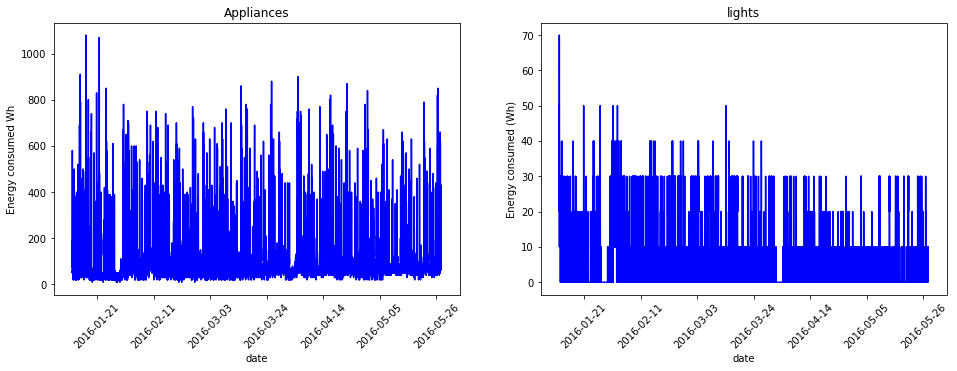

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

axes[0].plot(energydata.date, energydata.Appliances, 'b')
axes[0].set_xlabel('date')
axes[0].set_ylabel('Energy consumed Wh')
axes[0].set_title('Appliances')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)
axes[1].plot(energydata.date, energydata.lights, 'b')
axes[1].set_xlabel('date')
axes[1].set_ylabel('Energy consumed (Wh)')
axes[1].set_title('lights')

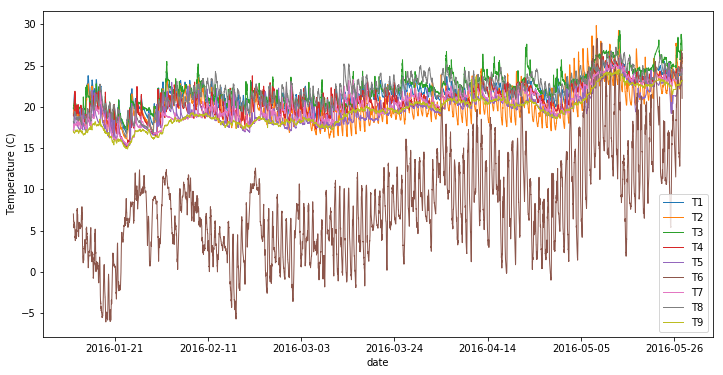

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
for i in range(1,10):
    number = str(i)
    name = "T"+number
    ax.plot(energydata.date, energydata[name], linewidth=1.)
    ax.legend();
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('date')

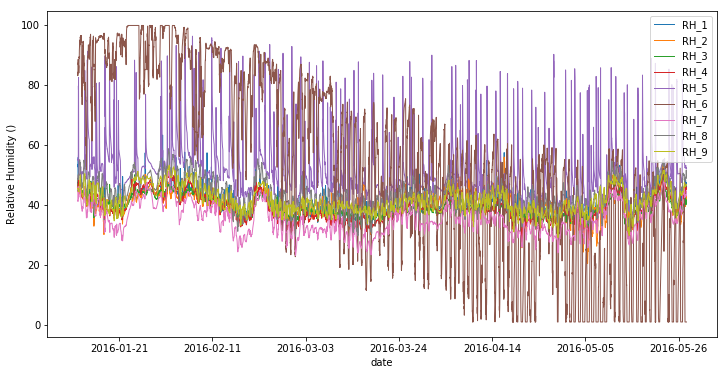

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
for i in range(1,10):
    number = str(i)
    name = "RH_"+number
    ax.plot(energydata.date, energydata[name], linewidth=1.)
    ax.legend();
ax.set_ylabel('Relative Humidity ()')
ax.set_xlabel('date')

In [17]:
comenergy = energydata[["date","Appliances","lights"]] #sub table with comsumed energy

In [20]:
comenergy.loc[:,"cumApp"] = comenergy.Appliances.cumsum()
comenergy.loc[:,"cumlights"] = comenergy.lights.cumsum()

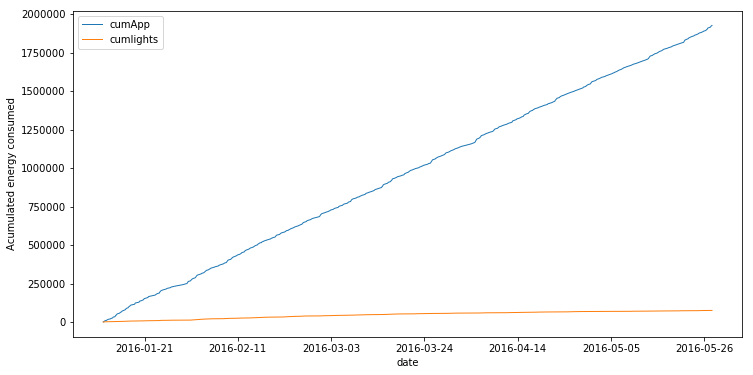

In [27]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(comenergy.date, comenergy.cumApp, linewidth=1.)
ax.plot(comenergy.date, comenergy.cumlights, linewidth=1.)
ax.legend();
ax.set_ylabel('Acumulated energy consumed')
ax.set_xlabel('date')

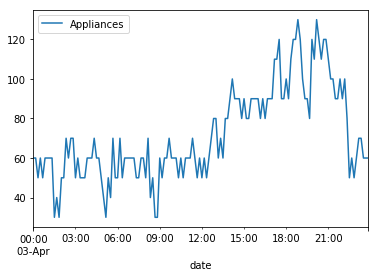

In [65]:
comenergy[(comenergy.date.dt.month == 4) & (comenergy.date.dt.day == 3)].plot(x="date",y="Appliances")

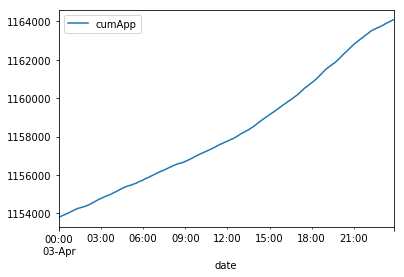

In [64]:
comenergy[(comenergy.date.dt.month == 4) & (comenergy.date.dt.day == 3)].plot(x="date",y="cumApp")

In [28]:
from pandas.tools.plotting import scatter_matrix

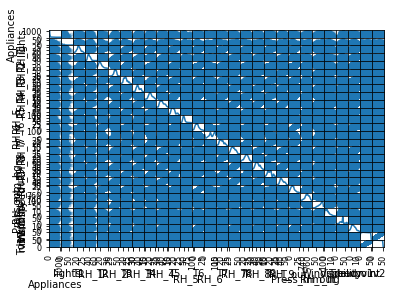

In [29]:
axs = scatter_matrix(energydata, alpha=0.2, diagonal='kde',figsize=(12,6))